<a href="https://colab.research.google.com/github/Tejaswini-Gsl/new/blob/master/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**G.Tejaswini**




TASK 6




● Create the Decision Tree classifier and visualize it graphically.








● The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.

In [91]:
import sklearn.datasets as dataset
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

**Import data using sklearn.datasets module**

In [2]:
iris= dataset.load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['Species']=iris.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Import data using Csv file**




In [6]:
# import data from drive 
data=pd.read_csv("/content/Iris.csv")
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Correlation between Features**


*   we find petal width, petal length and sepal length with more correlation with our target feature species




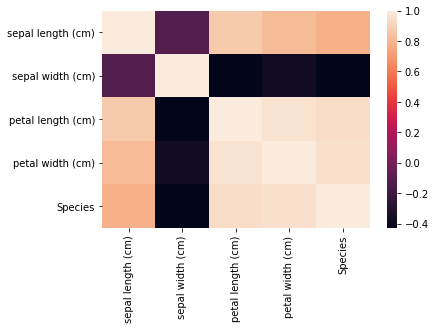

In [94]:
a= sns.heatmap(df.corr())

**divide x and y values **

1.   where x = features used for prediction
2.   y = target feature that should be predicted



In [104]:
x=data.iloc[:,[1,3,4]] # removing sepal width as it is less correlated


In [96]:
Y= data["Species"]
Y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

**Label encode y target feature** 

label encoding - converting the labels into numeric form



In [97]:
l=preprocessing.LabelEncoder()
y=l.fit_transform(Y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Divide the data for training and testing**


In [98]:

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=10)

In [99]:
print(y_train)
print("**************************")
print(y_test)

[0 1 1 2 2 1 2 1 1 1 0 0 1 0 2 0 0 2 1 2 0 2 0 1 1 0 2 2 2 2 2 0 1 2 1 0 2
 1 1 0 0 0 1 2 2 1 0 0 0 2 2 1 1 2 2 2 2 1 0 0 1 0 0 2 1 0 0 0 1 0 1 0 1 2
 0 1 1 2 0 2 0 1 1 2 2 0 1 2 2 1 1 2 0 2 0 0 1 0 2 2 2 1 0 2 0]
**************************
[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2 1 1 2 2 2 0 2
 2 2 2 0 0 1 0 1]


**Decision Tree model**



In [100]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

**Evaluating Model**


In [101]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


In [78]:
print("Confusion Matrix:",confusion_matrix(y_test,y_pred))
print("Report:",classification_report(y_test,y_pred))

Confusion Matrix: [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



**Visualize Decision Tree**


1.  export_graphviz function converts decision tree classifier into dot file
2.   pydotplus convert this dot file to png



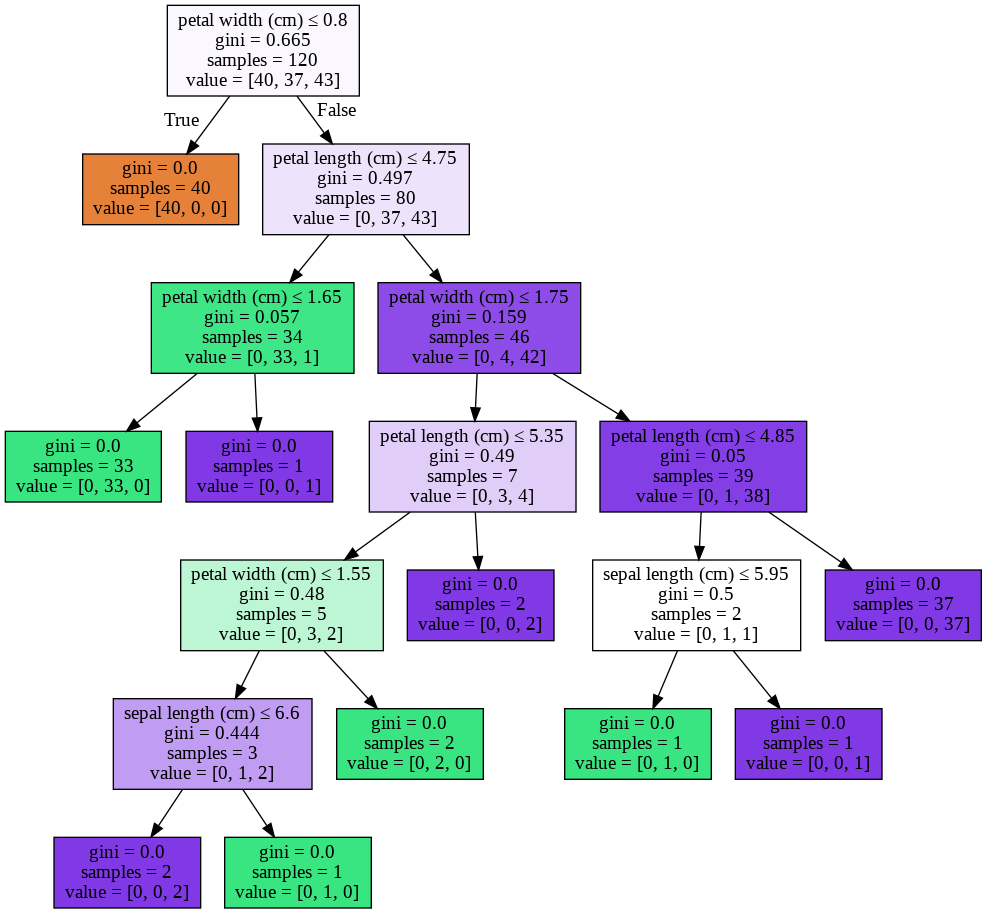

In [42]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=False,
                special_characters=True,feature_names = iris.feature_names )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('iris.png')
Image(graph.create_png())